<a href="https://colab.research.google.com/github/Yago-Pacheco/Analise-de-Dados-com-Python/blob/master/An%C3%A1lise_de_Relat%C3%B3rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisando um relatório

Para esta análise, recomendo que deixe a planilha dentro do seu google drive. Caso não a tenha colocado, você pode arrastar ela pasta de arquivos dentro do colab. Caso queira utilizar a planilha que estou usando deixei ela disponível no Git. Entretanto as planilhas tem dados criados por mim, fogem um pouco do real, porém não retira seu valor demostrativo e didático, o qual é meu objetivo. Sem mais enrolações vamos lá ! 

<center><img width='45%' src='https://www.grupoescolar.com/fotos/relatorio-A6.jpg'>



## Instalado uma biblioteca

Aqui irei mostar como se faz o download de uma biblioteca.Um dos gráficos que vamos usar é o do estilo **waffle** para isso vamos fazer o uso da biblioteca `pywaffle`.

In [ ]:
!pip install pywaffle -q

## Importando arquivos

Primeiramente vamos começar a fazer a importação do nosso arquivo. Para isso vamos importa algumas bibliotecas.

In [ ]:
#importação das bib
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
from pywaffle import Waffle

Iremos usar a função mount() para importa os arquivos do google drivre.

In [ ]:
#importação
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Com o seu GD conectado copia o caminho da planilha e cole na função `pd.read_excel()`. utilize o comando `None` para que abra todas as abas da planilha, caso essa tenha mais de uma.

In [ ]:
dados = pd.read_excel('/content/gdrive/My Drive/media_de_carnes.xlsx', None)

In [ ]:
#abrindo o arquivo
dados

{'Itens':   Carnes para churrasco Unnamed: 1      Unnamed: 2
 0                Bovina      Suína             Ave
 1               Alcatra    Barriga             Asa
 2         Chã de dentro      Lombo  Filé de frango
 3           Chã de fora     Pernil             NaN
 4           Contra filé        NaN             NaN
 5               Maminha        NaN             NaN
 6               Picanha        NaN             NaN
 7               Costela        NaN             NaN,
 'Vendas':    Data da venda  Carnes  Quantidade(Kg)  Preço médio(Kg)  Total de Vendas
 0     2020-01-02  Bovina              20            35.99           719.80
 1     2020-01-02  Bovina              30            35.99          1079.70
 2     2020-01-03     Ave              15            20.99           314.85
 3     2020-01-03  Bovina              40            35.99          1439.60
 4     2020-01-04  Bovina              20            35.99           719.80
 ..           ...     ...             ...              .

Observe que a planilha encima exibe duas abas. Porém este formato é bem complicado de se ler. Para isso vamos usar a função `.keys()` para listar as abas.

In [ ]:
dados.keys()

dict_keys(['Itens', 'Vendas'])

Vamos trabalhar com a aba 'Vendas'. Para isso vamos definir a variavel dados para utilizarmos apenas esta aba.

In [ ]:
dados['Vendas']

,Data da venda,Carnes,Quantidade(Kg),Preço médio(Kg),Total de Vendas
0,2020-01-02,Bovina,20,35.99,719.80
1,2020-01-02,Bovina,30,35.99,1079.70
2,2020-01-03,Ave,15,20.99,314.85
3,2020-01-03,Bovina,40,35.99,1439.60
4,2020-01-04,Bovina,20,35.99,719.80
...,...,...,...,...,...
85,2020-01-29,Bovina,10,35.99,359.90
86,2020-01-29,Suína,15,21.99,329.85
87,2020-01-29,Bovina,30,35.99,1079.70
88,2020-01-30,Bovina,20,35.99,719.80


Caso queira trabalhar com apenas uma coluna especifica, você faz o seguinte comando:

In [ ]:
dados['Vendas']['Carnes']

0     Bovina
1     Bovina
2        Ave
3     Bovina
4     Bovina
       ...  
85    Bovina
86     Suína
87    Bovina
88    Bovina
89    Bovina
Name: Carnes, Length: 90, dtype: object

## Operações Matemáticas

Aqui irei fazer algumas operações matemáticas, para facilitar nossa análise.

In [ ]:
total_venda = dados['Vendas']['Total de Vendas']

In [ ]:
#soma
total_venda.sum()

76029.49

In [ ]:
#média
total_venda.mean()

844.7721111111111

## Gráficos

Aqui eu irei fazer um gráfico simples de linha, para mostrar o Total de vendas. Aqui iremos fazer uso do `matplotlib`.

In [ ]:
 venda = dados['Vendas']

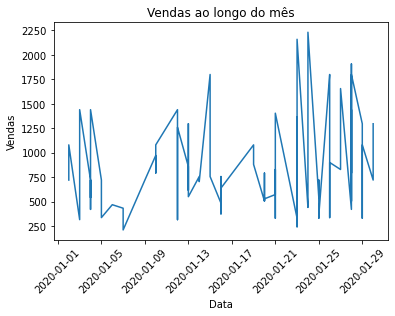

In [ ]:
#plotando o gráfico
plt.plot('Data da venda', 'Total de Vendas', data=venda)

#titulos
plt.title('Vendas ao longo do mês')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.xticks(rotation=45)

#plot
plt.show()

Agora vamos fazer um histograma para saber os dias da semana que as vendas foram mas lucrativos.

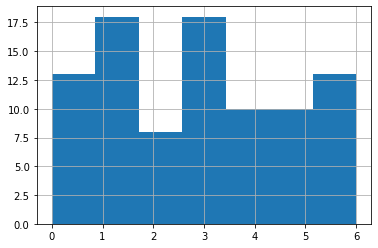

In [ ]:
venda['Data da venda'].apply(lambda x: x.weekday()).hist(bins=7)

Aqui percebemos que a galera gosta de fazer um churrasco mesmo é na segunda-feira !! Lembrando que a planilha usada é apenas um modelo demo, então está bem fora da realidade.

Agora vamos usar o famoso gráfico de **Waffle** que cai entre nós muito melhor que o de **pizza** e também de mais fácil entendimento.

In [ ]:
#variavel para o waffle
item = dict(venda['Carnes'].value_counts())

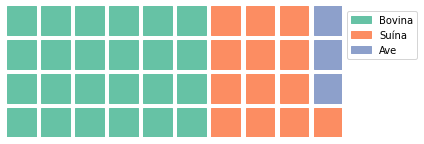

In [ ]:
#plotando o Waffle
fig = plt.figure(
    FigureClass=Waffle,
    rows=4,
    columns=10,
    values=item,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)}
)
fig.set_tight_layout(False)
plt.show()

Aqui encerramos nossa simples aálise, lembrando que caso for uma planilha rotineira, você só altera a variavel `dados` colocando o caminho da nova planilha e roda tudo de novo. Espero que este simples script tenha sido de ajuda. Bons estudos, python is life.